C:\Users\israe\AppData\Local\Temp\ipykernel_8632\667801826.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/PS_2024.04.02_11.16.01.csv')


<Axes: xlabel='disc_year', ylabel='Count'>

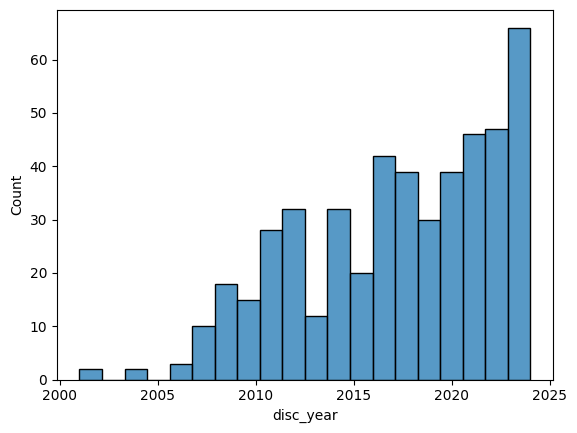

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/PS_2024.04.02_11.16.01.csv')
# Dejar solo planeta confirmados, metodo deteccion, nombre planeta, periodo orbital, año de descubrimiento, masa y radio del planeta tierra
col_list = ['pl_name', 'discoverymethod', 'disc_year','pl_orbper','soltype', 'pl_rade','pl_masse','st_mass']
df = df[col_list]
# Dejar planetas confirmados unicos
df = df.drop_duplicates(subset=['pl_name'])
# Drop filas con valores nulos
df = df.dropna()
# Dropear columna pl_name
df = df.drop(columns=['pl_name'])
# Hacer histograma de años y metodos de descubrimiento
sns.histplot(df['disc_year'], bins=20)



